<a href="https://colab.research.google.com/github/JThom95/GIS322/blob/main/JThoma_GIS322_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Import all necessary modules
import math
import numpy as np
from shapely.geometry import MultiLineString, MultiPoint, LineString, Point
from matplotlib import pyplot

In [ ]:
### Read the coumns: 'from_x', 'from_y', 'to_x', 'to_y' from the file 
### "travelTimes_example_2019.txt" into a numpy array

data = np.loadtxt('travelTimes_example_2019.txt', skiprows= 1, delimiter=';', 
                  usecols= [5,6,7,8], dtype = int)

In [ ]:
### Create an object called od_lines of the type MultiLineString to save all 
### origin-destination segments from the numpy array

# Create empty list to store coordinate pairs

coords = []

# Create and run a function that iterates over the numpy array and adds  
# coordinate pairs to list as a tuple of points

def getCoords():
  for i in data:
    coords.append(((i[0],i[1]),(i[2],i[3])))
getCoords()

# Now that list is in proper format, push into MultiLineString type and save as
# new variable od_lines

od_lines = MultiLineString(coords)

In [ ]:
### Iterate over the list of coordinates to get the max and min values
### for the axes in the next step

xcoords = []
ycoords = []

def getRange():
  for i in coords:
    xcoords.append(i[0][0])
    xcoords.append(i[1][0])
    ycoords.append(i[0][1])
    ycoords.append(i[1][1])
  print("The Max X value is: ", max(xcoords))
  print("The Min X value is: ", min(xcoords))
  print("The Max Y value is: ", max(ycoords))
  print("The Min Y value is: ", min(ycoords))

getRange()

The Max X value is:  90
The Min X value is:  11
The Max Y value is:  90
The Min Y value is:  11


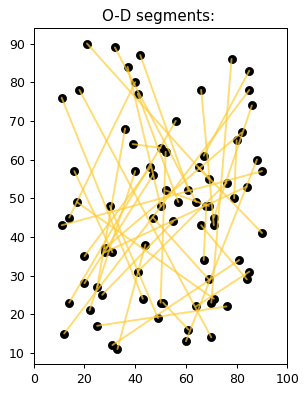

In [ ]:
### Visualize all the lines in od_lines using matplotlib

COLOR = {
    True:  '#6699cc',
    False: '#ffcc33'
    }

def v_color(ob): 
    return COLOR[ob.is_simple]

# display cordinates 

def plot_coords(ax, ob):  
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, 'o', color='#999999', zorder=1)

# display coordinates at the bound (begin and end points of a line)

def plot_bounds(ax, ob): 
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, 'o', color='#000000', zorder=1)

# draw lines

def plot_lines(ax, ob): 
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, color=v_color(ob), alpha=0.7,  solid_capstyle='round', 
                zorder=2)

# figuresize -- provide width and height information

fig = pyplot.figure(1, figsize=(8.0, 4.0*(math.sqrt(5)-1)), dpi=90) 

# Plug in multi line string and adjust range values to 

ax = fig.add_subplot(121)

plot_coords(ax, od_lines)
plot_bounds(ax, od_lines)
plot_lines(ax, od_lines)

ax.set_title('O-D segments: ')

xrange = [0, 100]
yrange = [0, 100]
ax.set_xlim(*xrange)

pyplot.show()


Everything checks out!


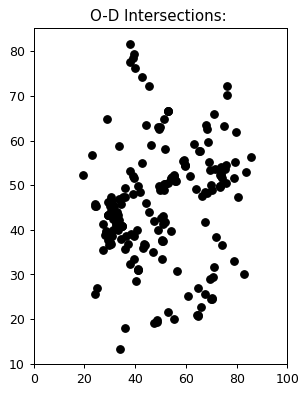

In [ ]:
### Identify all the intersection points of these OD lines using shapely and 
### visualize all intersection points

num = len(od_lines)
allinters = []
count = 0

# Coduct test to see if two lines intersect, if they do add intersection 
# point to list allinters. Then push allinters list into Multipolygon 

for i in range(num-1): 
  for j in range(i+1, num): 
      line_i = od_lines[i]
      line_j = od_lines[j]
      if (line_i.intersects(line_j)) == True:
        count += 1
        inters = Point(line_i.intersection(line_j))  
        allinters.append(inters)
      else:
       pass
  
intfin = MultiPoint(allinters)

# Check to ensure all intersections were added

intfincount = 0
for i in intfin:
  intfincount += 1
if intfincount == count:
  print('Everything checks out!')

# Visualize all the points in intfin using matplotlib

COLOR = {
    True:  '#6699cc',
    False: '#ffcc33'
    }

def v_color(ob): 
    return COLOR[ob.is_simple]

# display cordinates 

def plot_coords(ax, ob):  
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, 'o', color='#000000', zorder=1)

# figuresize -- provide width and height information

fig = pyplot.figure(1, figsize=(8.0, 4.0*(math.sqrt(5)-1)), dpi=90) 

# Plug in multi line string and adjust range values to 

ax = fig.add_subplot(121)

plot_coords(ax, intfin)


ax.set_title('O-D Intersections: ')

xrange = [0, 100]
yrange = [0, 100]
ax.set_xlim(*xrange)

pyplot.show()